<a href="https://colab.research.google.com/github/Shrason/Projects/blob/main/EDA_Indian_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indian Cars: Data Analysis and Visualization

Around 3.34 Lakh passenger cars were sold in the Indian market in May 2023. The sales increased by over 13% when compared to May last year. The Top 25 Selling Cars constituted over 75% of the cars sold in April 2023.


**Libaries Import**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


**Data Loading and Data Information**

---



In [ ]:
df = pd.read_csv('/content/cars_ds_final.csv')

In [ ]:
df.shape

(1276, 141)

In [ ]:
df.head(3)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1276.000000,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,637.500000,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,368.493781,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,318.750000,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,637.500000,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,956.250000,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,1275.000000,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


**Data Cleaning**

---



_Redefining the Data

In [ ]:
df.rename(columns=str.lower, inplace=True)

In [ ]:
data = df[['make','model','ex-showroom_price','body_type','displacement', 'cylinders', 'fuel_system', 'fuel_tank_capacity', 'fuel_type', 'city_mileage', 'seating_capacity','basic_warranty', 'child_safety_locks', 'number_of_airbags', 'parking_assistance', 'navigation_system']]

In [ ]:
data.head(3)

,make,model,ex-showroom_price,body_type,displacement,cylinders,fuel_system,fuel_tank_capacity,fuel_type,city_mileage,seating_capacity,basic_warranty,child_safety_locks,number_of_airbags,parking_assistance,navigation_system
0,Tata,Nano Genx,"Rs. 2,92,667",Hatchback,624 cc,2.0,Injection,24 litres,Petrol,?23.6 km/litre,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN
1,Tata,Nano Genx,"Rs. 2,36,447",Hatchback,624 cc,2.0,Injection,24 litres,Petrol,?23.6 km/litre,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN
2,Tata,Nano Genx,"Rs. 2,96,661",Hatchback,624 cc,2.0,Injection,15 litres,CNG,NaN,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN


In [ ]:
data.tail()

,make,model,ex-showroom_price,body_type,displacement,cylinders,fuel_system,fuel_tank_capacity,fuel_type,city_mileage,seating_capacity,basic_warranty,child_safety_locks,number_of_airbags,parking_assistance,navigation_system
1271,Honda,City,"Rs. 13,02,000",Sedan,1498 cc,4.0,Injection,40 litres,Diesel,22.6 km/litre,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",Yes,2.0,Front and rear sensors with camera,Yes
1272,Honda,City,"Rs. 14,21,000",Sedan,1498 cc,4.0,Injection,40 litres,Diesel,22.6 km/litre,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",Yes,6.0,Rear sensors with camera,Yes
1273,Honda,City,"Rs. 14,31,000",Sedan,1497 cc,4.0,Injection,40 litres,Petrol,18 km/litre,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",Yes,6.0,Rear sensors with camera,Yes
1274,Honda,City,"Rs. 12,01,000",Sedan,1497 cc,4.0,Injection,40 litres,Petrol,14.3 km/litre,5.0,"2 Years / 40,000 Kms (Whichever comes earlier)",Yes,2.0,Front and rear sensors with camera,Yes
1275,Mitsubishi,Montero,"Rs. 68,62,560",SUV,3200 cc,4.0,Injection,88 litres,Diesel,8.25 km/litre,7.0,NaN,Yes,6.0,Rear sensors with camera,Yes


_Checking for Appropriate Datatype

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make                1201 non-null   object 
 1   model               1276 non-null   object 
 2   ex-showroom_price   1276 non-null   object 
 3   body_type           1270 non-null   object 
 4   displacement        1264 non-null   object 
 5   cylinders           1210 non-null   float64
 6   fuel_system         1268 non-null   object 
 7   fuel_tank_capacity  1207 non-null   object 
 8   fuel_type           1276 non-null   object 
 9   city_mileage        721 non-null    object 
 10  seating_capacity    1270 non-null   float64
 11  basic_warranty      836 non-null    object 
 12  child_safety_locks  1201 non-null   object 
 13  number_of_airbags   1141 non-null   float64
 14  parking_assistance  986 non-null    object 
 15  navigation_system   683 non-null    object 
dtypes: flo

In [ ]:
data['ex-showroom_price'].head(3)

0    Rs. 2,92,667
1    Rs. 2,36,447
2    Rs. 2,96,661
Name: ex-showroom_price, dtype: object

In [ ]:
data['ex-showroom_price'] = data['ex-showroom_price'].str.replace('Rs.','').str.replace(',','')

In [ ]:
data['ex-showroom_price'] = data['ex-showroom_price'].astype('int64')

In [ ]:
data['city_mileage'].head(3)

0    ?23.6 km/litre
1    ?23.6 km/litre
2               NaN
Name: city_mileage, dtype: object

In [ ]:
data['city_mileage'] = data['city_mileage'].str.replace('?','').str.replace('km/litre','').str.replace(',','.').str.replace('%','')

In [ ]:
data['city_mileage'] = data['city_mileage'].str.replace('12.5-12.7','12.6').str.replace('26032','26.32').str.strip()

In [ ]:
data['city_mileage'] = data['city_mileage'].astype('float64')

In [ ]:
data['fuel_tank_capacity'] = data['fuel_tank_capacity'].str.replace('litre','').str.replace('s','').str.strip()

In [ ]:
data['fuel_tank_capacity'] = data['fuel_tank_capacity'].astype('float64')

In [ ]:
data['displacement'] = data['displacement'].str.replace('cc','')

In [ ]:
data['displacement'] = data['displacement'].astype('float64')

In [ ]:
data['cylinders'] = data['cylinders'].astype('float64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make                1201 non-null   object 
 1   model               1276 non-null   object 
 2   ex-showroom_price   1276 non-null   int64  
 3   body_type           1270 non-null   object 
 4   displacement        1264 non-null   float64
 5   cylinders           1210 non-null   float64
 6   fuel_system         1268 non-null   object 
 7   fuel_tank_capacity  1207 non-null   float64
 8   fuel_type           1276 non-null   object 
 9   city_mileage        721 non-null    float64
 10  seating_capacity    1270 non-null   float64
 11  basic_warranty      836 non-null    object 
 12  child_safety_locks  1201 non-null   object 
 13  number_of_airbags   1141 non-null   float64
 14  parking_assistance  986 non-null    object 
 15  navigation_system   683 non-null    object 
dtypes: flo

_Checking for Null Values

In [ ]:
data.isnull().sum()

make                   75
model                   0
ex-showroom_price       0
body_type               6
displacement           12
cylinders              66
fuel_system             8
fuel_tank_capacity     69
fuel_type               0
city_mileage          555
seating_capacity        6
basic_warranty        440
child_safety_locks     75
number_of_airbags     135
parking_assistance    290
navigation_system     593
dtype: int64

In [ ]:
data.isnull().any().any()

True

In [ ]:
data['make'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Land Rover Rover', 'Mitsubishi', 'Maruti Suzuki R'], dtype=object)

In [ ]:
data['make'] = data['make'].str.replace('Maruti Suzuki R','Maruti Suzuki').str.replace('Bmw','BMW').str.replace('Mg','MG').str.replace('Land Rover Rover','Land Rover').str.replace('Icml','ICML')

In [ ]:
data['make'].value_counts()

Maruti Suzuki    163
Hyundai          130
Mahindra         119
Tata             100
Toyota            82
Honda             64
Skoda             43
Ford              43
Land Rover        37
BMW               37
Renault           36
Volkswagen        34
Audi              31
Nissan            29
Jeep              28
Fiat              23
Jaguar            22
Kia               21
Volvo             18
Datsun            15
Porsche           14
MG                13
Lamborghini       13
ICML              11
Mini              10
Lexus             10
Maserati           9
Ferrari            8
Mitsubishi         7
Bentley            6
Force              6
Premier            6
Isuzu              5
Aston Martin       3
Bugatti            2
Bajaj              2
Dc                 1
Name: make, dtype: int64

**Univariate Analysis**

---



In [ ]:
categoric_data = data.select_dtypes('object')
numeric_discrete_data = data.select_dtypes('int64')
numeric_continuous_data = data.select_dtypes('float64')

In [ ]:
categoric_data.columns

Index(['make', 'model', 'body_type', 'fuel_system', 'fuel_type',
       'basic_warranty', 'child_safety_locks', 'parking_assistance',
       'navigation_system'],
      dtype='object')

In [ ]:
numeric_discrete_data.columns

Index(['ex-showroom_price'], dtype='object')

In [ ]:
numeric_continuous_data.columns

Index(['displacement', 'cylinders', 'fuel_tank_capacity', 'city_mileage',
       'seating_capacity', 'number_of_airbags'],
      dtype='object')

_Non-Vizual Analysis:

In [ ]:
def discrete_feature(discrete_feature):
  for col in discrete_feature:
    print('*'*5 , col , '*'*5)
    print(discrete_feature[col].agg(['count','nunique','unique']))
    print('value_count: \n', discrete_feature[col].value_counts())
    print()

In [ ]:
discrete_feature(categoric_data)

***** make *****
count                                                   1201
nunique                                                   37
unique     [Tata, Datsun, Renault, Maruti Suzuki, Hyundai...
Name: make, dtype: object
value_count: 
 Maruti Suzuki    163
Hyundai          130
Mahindra         119
Tata             100
Toyota            82
Honda             64
Skoda             43
Ford              43
Land Rover        37
BMW               37
Renault           36
Volkswagen        34
Audi              31
Nissan            29
Jeep              28
Fiat              23
Jaguar            22
Kia               21
Volvo             18
Datsun            15
Porsche           14
MG                13
Lamborghini       13
ICML              11
Mini              10
Lexus             10
Maserati           9
Ferrari            8
Mitsubishi         7
Bentley            6
Force              6
Premier            6
Isuzu              5
Aston Martin       3
Bugatti            2
Bajaj              2
Dc 

* Maruti Suzuki is the highly opted car followed by Hundai.
* Most opted models are Nexon, Kuv100 Nxt, Compass, Xuv500 and Amaze.
* SUV, Sedan and Hatchback are the highly opted body type of cars.
* Petrol followed by Diesel are the most common options.
* 2-3 years basic warranty with unlimited Kms are mostly opted.
* Rear sensors with camera is the highly opted for parking assistance.


In [ ]:
discrete_feature(numeric_continuous_data)

***** displacement *****
count                                                   1264
nunique                                                  129
unique     [624.0, 799.0, 999.0, 1196.0, 998.0, 1198.0, 1...
Name: displacement, dtype: object
value_count: 
 1197.0    108
1498.0     87
1248.0     62
1198.0     58
1497.0     56
         ... 
6750.0      1
3198.0      1
2400.0      1
3900.0      1
3200.0      1
Name: displacement, Length: 129, dtype: int64

***** cylinders *****
count                                                   1210
nunique                                                    9
unique     [2.0, 3.0, 4.0, nan, 5.0, 6.0, 8.0, 12.0, 10.0...
Name: cylinders, dtype: object
value_count: 
 4.0     789
3.0     213
6.0     106
8.0      53
12.0     21
5.0      10
10.0     10
2.0       6
16.0      2
Name: cylinders, dtype: int64

***** fuel_tank_capacity *****
count                                                   1207
nunique                                                   63

* Four cylinders cars are most popular.
* Fuel tank capacity of 35-45 Liters is chosen by many buyers.
* 12 kms/hr city mileage , 2 number of airbags and 5 seating capacity is the most popular choose.


In [ ]:
def numeric_feature_stats(numeric_feature):
  for col in numeric_feature:
    print('*'*5 , col , '*'*5)
    print(numeric_feature[col].agg(['min','max','mean','median','std']))
    print()

In [ ]:
numeric_feature_stats(numeric_discrete_data)

***** ex-showroom_price *****
min       2.364470e+05
max       2.121554e+08
mean      4.596538e+06
median    1.060064e+06
std       1.214735e+07
Name: ex-showroom_price, dtype: float64



_Visual Analysis:

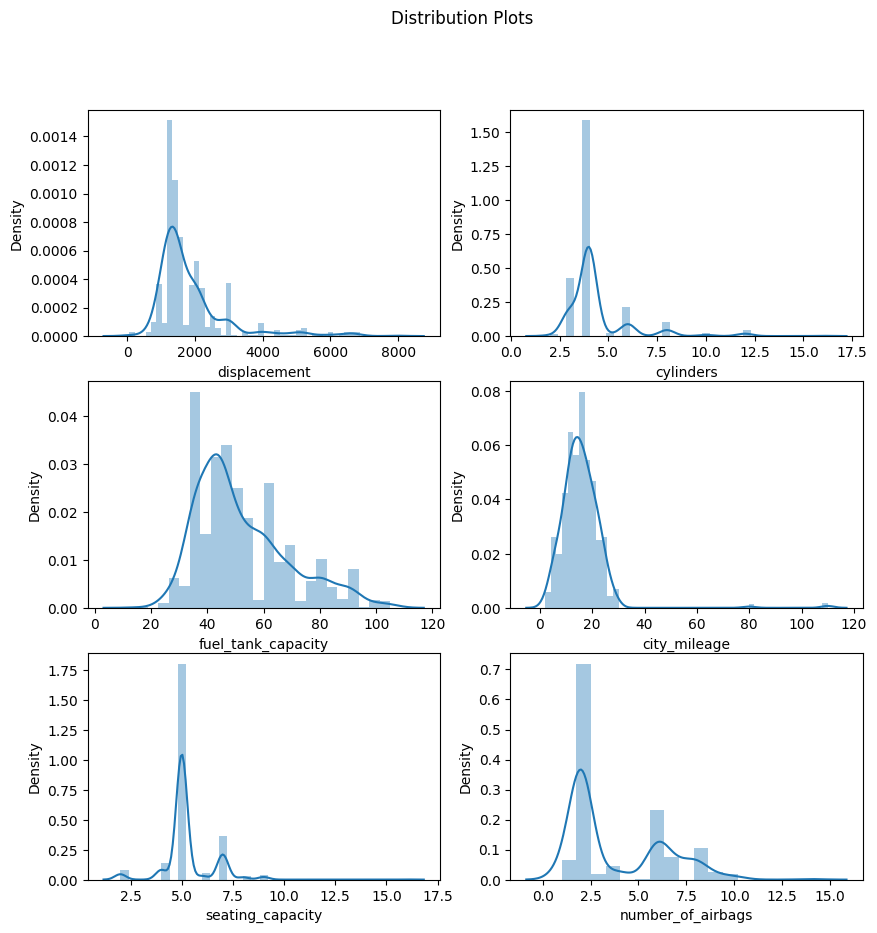

In [ ]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_continuous_data.columns) / 2)),
                         ncols=2, figsize=(10, 10))

for i, column in enumerate(numeric_continuous_data.columns):
    row = int(i // 2)
    col = i % 2
    sns.distplot(numeric_continuous_data[column], ax=axes[row, col])

fig.suptitle("Distribution Plots")

plt.show()

* Displacement, cylinders, fuel tank capacity, city mileage, seating capacity and number of airbags all data distribution plot is right skewed.

displacement             Axes(0.125,0.814746;0.352273x0.0652542)
cylinders             Axes(0.547727,0.814746;0.352273x0.0652542)
fuel_tank_capacity       Axes(0.125,0.736441;0.352273x0.0652542)
city_mileage          Axes(0.547727,0.736441;0.352273x0.0652542)
seating_capacity         Axes(0.125,0.658136;0.352273x0.0652542)
number_of_airbags     Axes(0.547727,0.658136;0.352273x0.0652542)
dtype: object

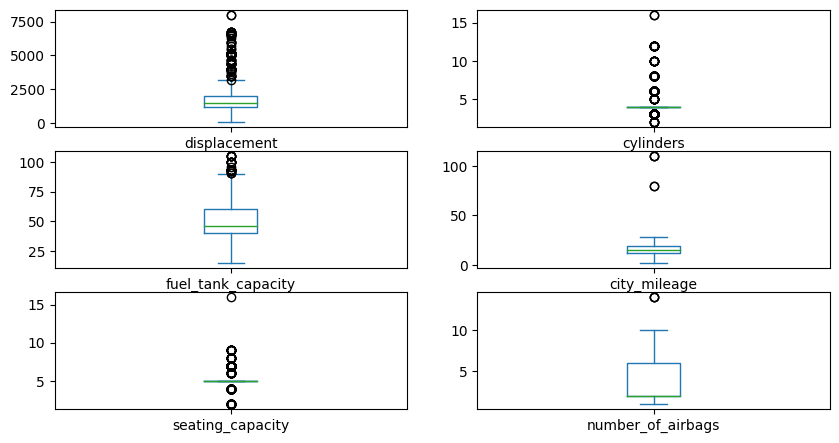

In [ ]:
numeric_continuous_data.plot(kind='box', subplots=True, layout=(10,2), figsize=(10,18))

In [ ]:
data = data[data['displacement'] < 5000]
data = data[data['cylinders'] < 10]
data = data[data['fuel_tank_capacity'] < 80]
data = data[data['city_mileage'] < 50]
data = data[data['seating_capacity'] < 10]
data = data[data['number_of_airbags'] < 10]

<Axes: ylabel='Density'>

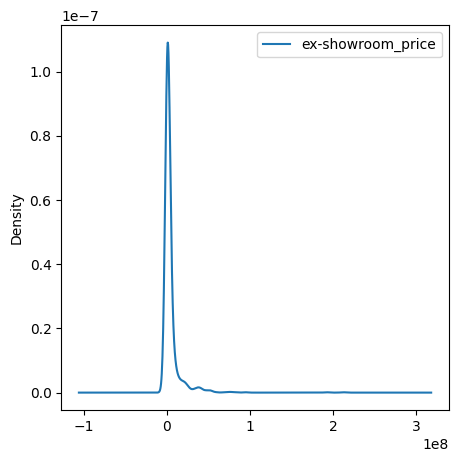

In [ ]:
numeric_discrete_data.plot(kind='kde', layout=(5,2), figsize=(5,5))

<Axes: >

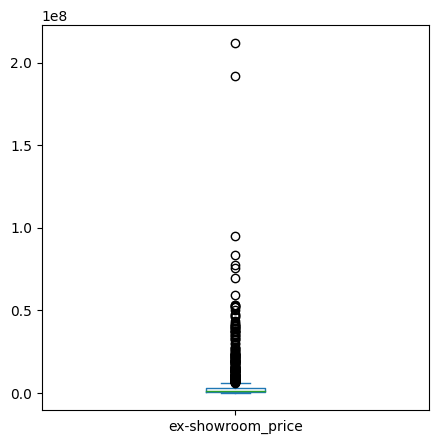

In [ ]:
numeric_discrete_data.plot(kind='box', layout=(5,2), figsize=(5,5))

In [ ]:
data = data[data['ex-showroom_price'] < 9000000]

**Bivariate Analysis**

---



In [ ]:
numeric_feature = data.select_dtypes(include=['float64', 'int64'])

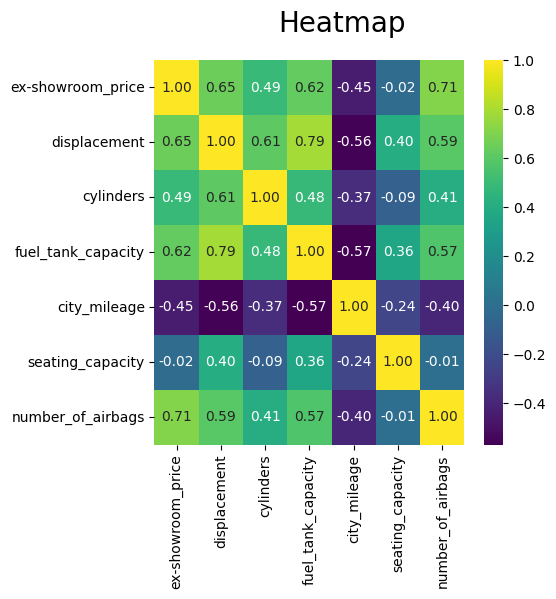

In [ ]:
f,ax = plt.subplots(figsize=(5,5))
corr= data.corr()
hm=sns.heatmap(round(corr,2),annot=True,cmap='viridis',fmt='.2f')
t=f.suptitle('Heatmap',fontsize=20)

- High correlation is obsereved in ex-showroom_price, displacement and fuel_tank_capacity
- Displacement, fuel_tank_capacity and seating capacity also shows considrable correlation.
- cylinders, ex-showroom_price, displacement and fuel_tank_capacity shows considrable correlation.
- Number of airbags and ex-showroom shows considrable correlation.

**Categorical Data Vs. Categorical Data

In [ ]:
categoric_data.columns

Index(['make', 'model', 'body_type', 'fuel_system', 'fuel_type',
       'basic_warranty', 'child_safety_locks', 'parking_assistance',
       'navigation_system'],
      dtype='object')

In [ ]:
make_body_type = pd.crosstab(data['make'],data['body_type'])
make_body_type.head()

body_type,Convertible,Coupe,Crossover,"Crossover, SUV",Hatchback,MPV,MUV,SUV,"SUV, Crossover",Sedan,"Sedan, Coupe","Sedan, Crossover"
make,,,,,,,,,,,,
Audi,1,0,0,0,0,0,0,9,0,4,0,0
BMW,0,1,0,2,0,0,0,3,2,3,0,0
Datsun,0,0,0,0,5,0,0,0,0,0,0,0
Fiat,0,0,3,0,2,0,0,0,0,3,0,0
Ford,0,0,0,0,1,0,0,0,0,0,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

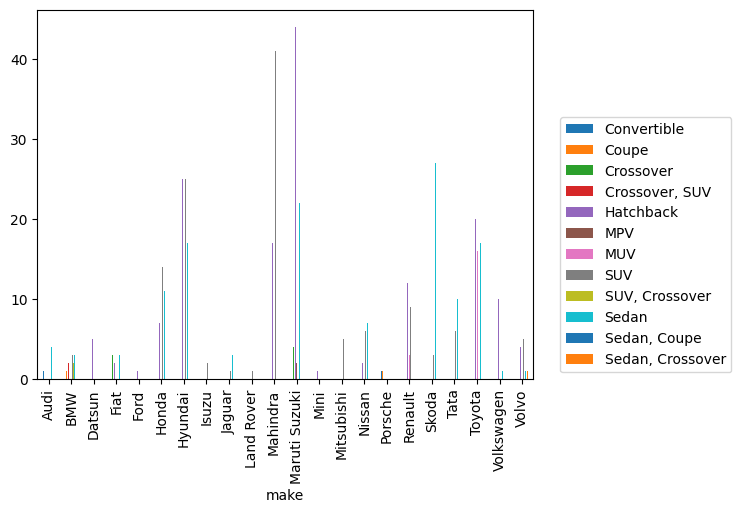

In [ ]:
ax = make_body_type.plot.bar()
ax.legend(bbox_to_anchor=(1.04, 0), loc="lower left")
plt.show

* Hatchback is seen highly popular in Maruti Suzuki followed by Sedan cars.
* For Volkswagen, Honda Sedan is the popular choose.

In [ ]:
make_fuel_type = pd.crosstab(data['make'],data['fuel_type'])
make_fuel_type.head()

fuel_type,Diesel,Hybrid,Petrol
make,,,
Audi,10,0,4
BMW,7,0,4
Datsun,0,0,5
Fiat,6,0,2
Ford,1,0,1


<Axes: xlabel='make'>

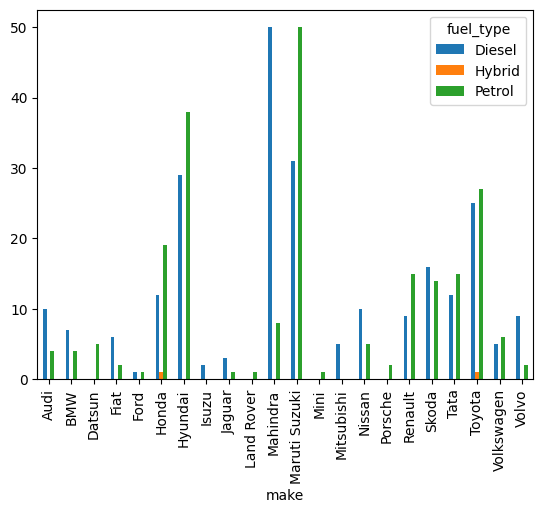

In [ ]:
make_fuel_type.plot.bar()

* Petrol followed by Diesel is the most popular choose for Maruti Suzuki, HYundai, Tata, Toyota and Renault.
* CNG cars is only popular from Hyundai, Maruti Suzuki.

In [ ]:
body_fuel_type = pd.crosstab(data['body_type'],data['fuel_type'])
body_fuel_type.head()

fuel_type,Diesel,Hybrid,Petrol
body_type,,,
Convertible,0,0,2
Coupe,0,0,2
Crossover,6,0,1
"Crossover, SUV",1,0,1
Hatchback,49,0,114


<Axes: xlabel='body_type'>

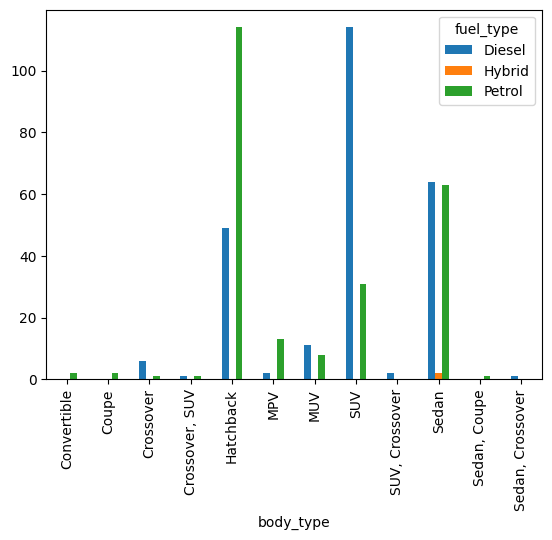

In [ ]:
body_fuel_type.plot.bar()

* Hatchback body type cars are mostly of Pertol.
* Suv body type are more of Diesel.

**Numerical Data Vs. Categorical Data

<Axes: xlabel='make'>

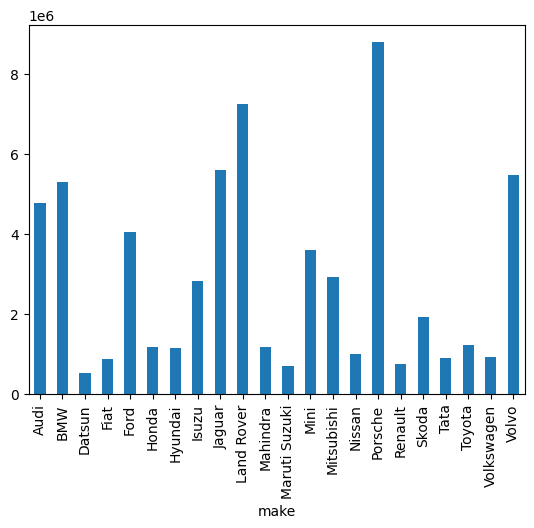

In [ ]:
mean_price_make = data.groupby(['make'])['ex-showroom_price'].mean()
mean_price_make.plot.bar()

* Among all make Porsche, followed by Land Rover have ex-showroom price near 8000000.

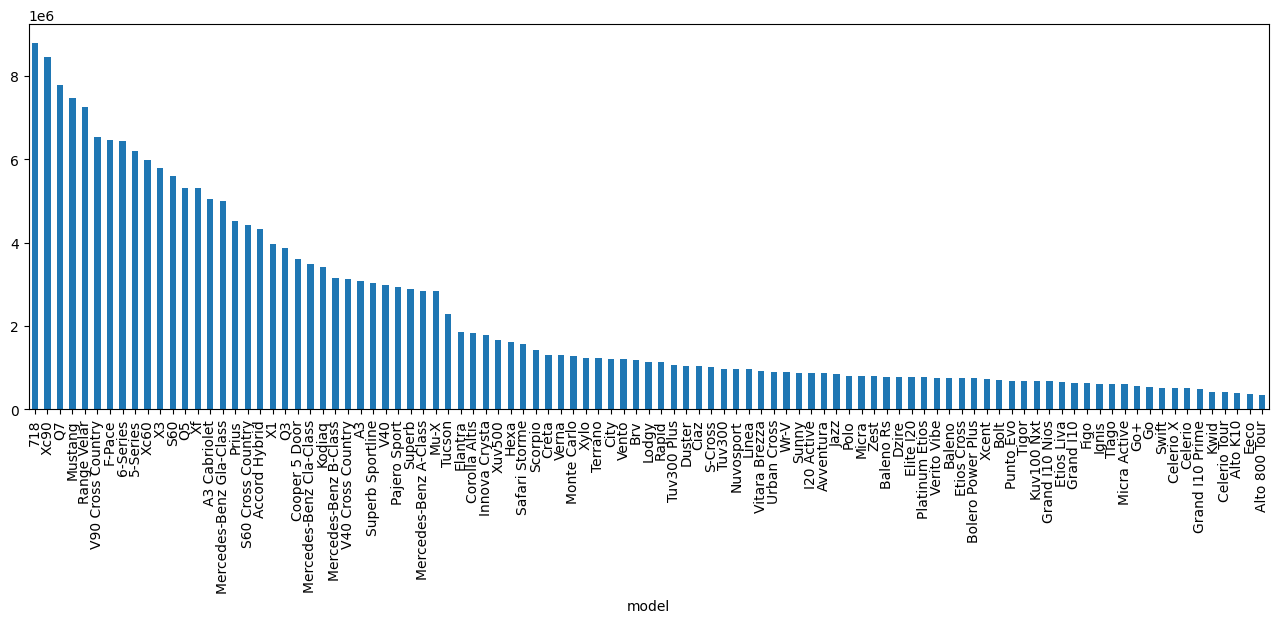

In [ ]:
mean_price_model = data.groupby(['model'])['ex-showroom_price'].mean()
mean_price_model = mean_price_model.sort_values(ascending=False)
mean_price_model.plot(kind='bar', figsize=(16, 5))
plt.show()

In [ ]:
data[data['model']=='718']

,make,model,ex-showroom_price,body_type,displacement,cylinders,fuel_system,fuel_tank_capacity,fuel_type,city_mileage,seating_capacity,basic_warranty,child_safety_locks,number_of_airbags,parking_assistance,navigation_system
305,Porsche,718,8995000,Convertible,1988.0,4.0,Injection,54.0,Petrol,9.0,2.0,NaN,Yes,4.0,Front and rear sensors with camera,Yes
306,Porsche,718,8595000,Coupe,1988.0,4.0,Injection,54.0,Petrol,9.0,2.0,NaN,Yes,4.0,Front and rear sensors with camera,Yes


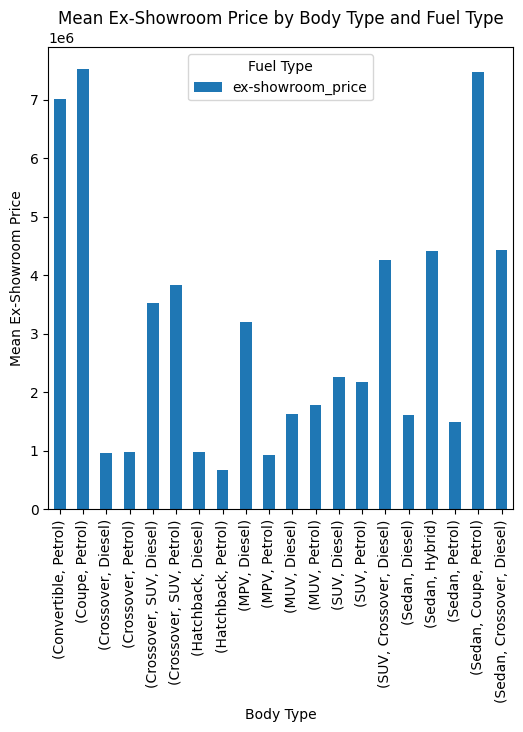

In [ ]:
mean_price_body_type = data.groupby(['body_type','fuel_type'])['ex-showroom_price'].mean()
mean_price_body_type.plot(kind='bar', figsize=(6, 6))
plt.xlabel('Body Type')
plt.ylabel('Mean Ex-Showroom Price')
plt.title('Mean Ex-Showroom Price by Body Type and Fuel Type')
plt.xticks(rotation=90)
plt.legend(title='Fuel Type')
plt.show()

* Crossover, hatchback, MPV, SUV body type cars ex-showroom prices are not much influenced by fuel type.
* Ex-showroom price of Sedan for Hybrid fuel type is high compare to petrol and diesel.

<Axes: xlabel='child_safety_locks,parking_assistance,navigation_system'>

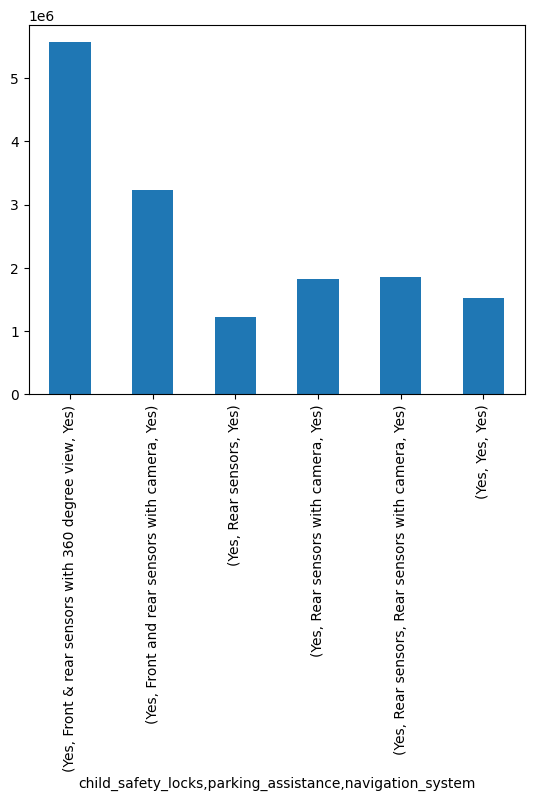

In [ ]:
mean_price_accessories = data.groupby(['child_safety_locks','parking_assistance','navigation_system'])['ex-showroom_price'].mean()
mean_price_accessories.plot(kind='bar')


* Child safety, navigation_system with front & rear sensor 360 degree view option have high ex-price showroom price.

**Numerical Data Vs. Numerical Data

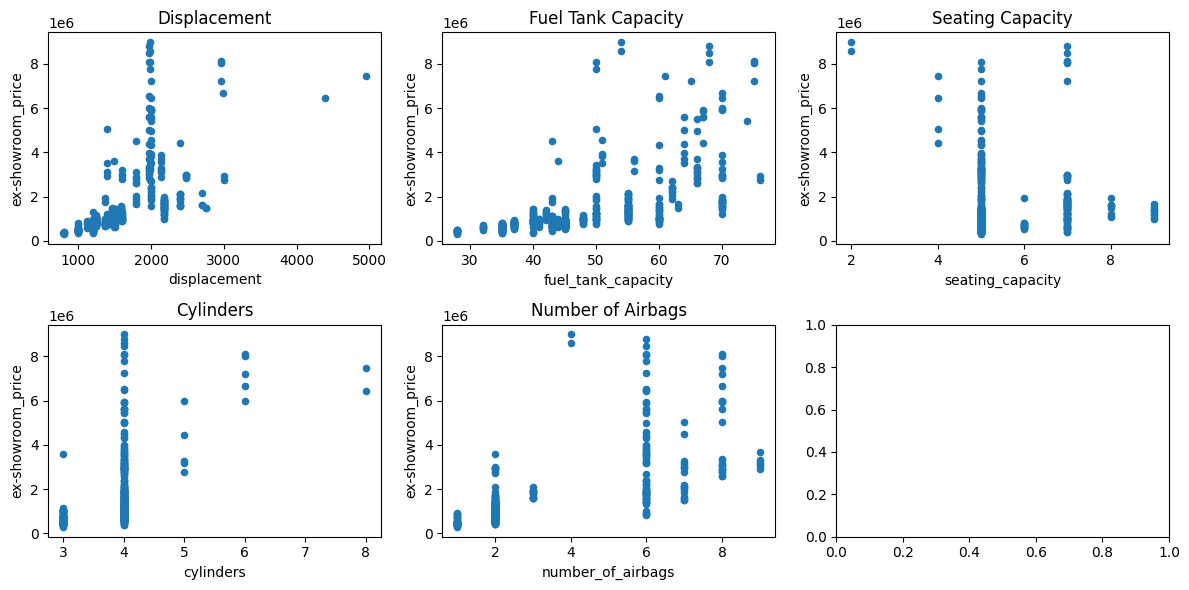

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

data.plot(kind='scatter', x='displacement', y='ex-showroom_price', ax=axes[0,0])
axes[0,0].set_title('Displacement')

data.plot(kind='scatter', x='fuel_tank_capacity', y='ex-showroom_price', ax=axes[0,1])
axes[0,1].set_title('Fuel Tank Capacity ')

data.plot(kind='scatter', x='seating_capacity', y='ex-showroom_price', ax=axes[0,2])
axes[0,2].set_title('Seating Capacity')

data.plot(kind='scatter', x='cylinders', y='ex-showroom_price', ax=axes[1,0])
axes[1,0].set_title('Cylinders')

data.plot(kind='scatter', x='number_of_airbags', y='ex-showroom_price', ax=axes[1,1])
axes[1,1].set_title('Number of Airbags')


plt.tight_layout()
plt.show()

<Axes: xlabel='fuel_tank_capacity', ylabel='displacement'>

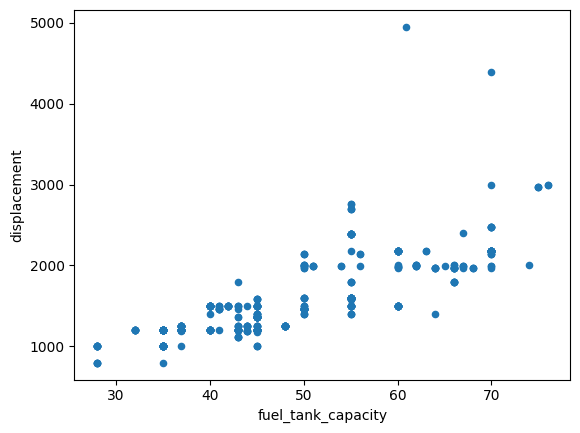

In [ ]:
data.plot(kind='scatter', x='fuel_tank_capacity', y='displacement')

**Overall Observations**

---


* Maruti Suzuki is the highly opted car followed by Hundai.
* Most opted models are Nexon, Kuv100 Nxt, Compass, Xuv500 and Amaze.
* SUV, Sedan and Hatchback are the highly opted body type of cars.
* Petrol followed by Diesel are the most common options.
* 2-3 years basic warranty with unlimited Kms are mostly opted.
* Rear sensors with camera is the highly opted for parking assistance.
* Four cylinders cars are most popular.
* Fuel tank capacity of 35-45 Liters is chosen by many buyers.
* 12 kms/hr city mileage , 2 number of airbags and 5 seating capacity is the most popular choose.

---


* High correlation is obsereved in ex-showroom_price, displacement and fuel_tank_capacity
* Displacement, fuel_tank_capacity and seating capacity also shows considrable correlation.
* cylinders, ex-showroom_price, displacement and fuel_tank_capacity shows considrable correlation.
* Number of airbags and ex-showroom shows considrable correlation.
* Hatchback is seen highly popular in Maruti Suzuki followed by Sedan cars.
* For Volkswagen, Honda Sedan is the popular choose.
* Hatchback body type cars are mostly of Pertol.
* Suv body type are more of Diesel.
* Among all make Porsche, followed by Land Rover have ex-showroom price near 8000000.
* Crossover, hatchback, MPV, SUV body type cars ex-showroom prices are not much influenced by fuel type.
* Ex-showroom price of Sedan for Hybrid fuel type is high compare to petrol and diesel.
* Child safety, navigation_system with front & rear sensor 360 degree view option have high ex-showroom price.

**Conclusion**

---
* Maruti Suzuki is the popular choose.
* Hatchback followed by Sedan are the popular car body type.
* High number cars are Petrol fuel type.
* Among all make Porsche model 718 have ex-showroom price near 8000000.
* Features influencing ex-showroom prices are body type,displacement, fuel tank capacity, child safety and navigation system.




---

